## Exploratory Data Analysis
#### Way to anlyse data sets, often uses data visualization methods, to summarize main characteristics of the data.

##### matplotlib and seaborn is good to use for EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Univariate Analysis: Continuous data

<AxesSubplot:ylabel='petal.length'>

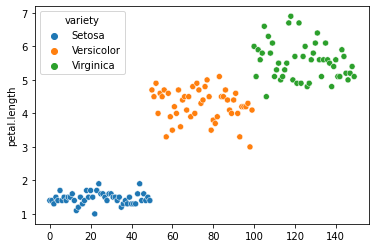

In [15]:
x_axis = df.index
y_axis = df['petal.length']

'''
SCATTER PLOT
'''
sns.scatterplot(x=x_axis, y=y_axis, hue=df['variety'])

<AxesSubplot:xlabel='variety', ylabel='petal.length'>

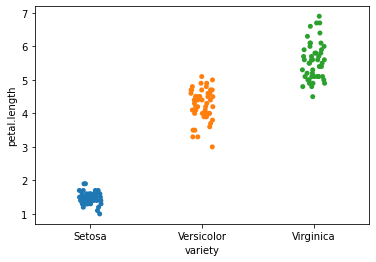

In [16]:
'''
STRIP PLOT
'''
sns.stripplot(x=df['variety'], y=df['petal.length'])

c:\Users\harsh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal.length', ylabel='Density'>

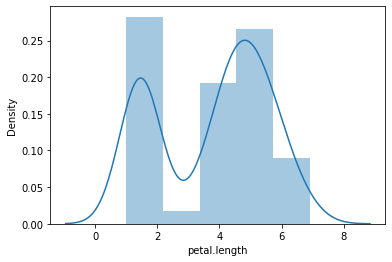

In [20]:
'''
Distribution plot
'''
sns.distplot(df['petal.length'])

<AxesSubplot:xlabel='petal.length'>

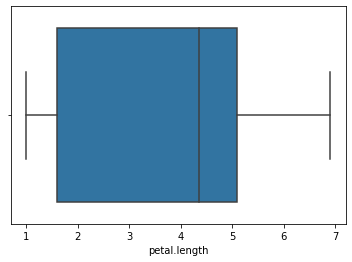

In [21]:
'''
BOX PLOT
'''
sns.boxplot(x=df['petal.length'])

#### Univariate Analysis: Categorical Data

<AxesSubplot:xlabel='variety', ylabel='count'>

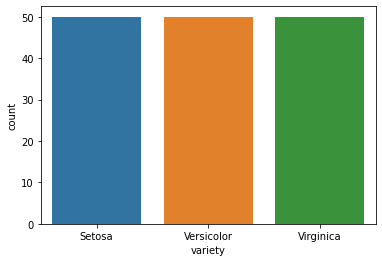

In [22]:
'''
COUNTPLOT
'''
sns.countplot(x=df['variety'])

([<matplotlib.patches.Wedge at 0x1662d7a7610>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Virginica')])

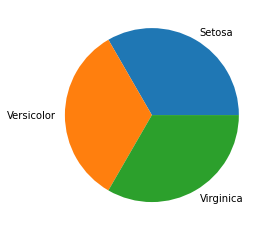

In [24]:
'''
PIE CHART
'''
legends = ['Setosa', 'Versicolor', 'Virginica']

plt.pie(df['variety'].value_counts(), labels = legends)

#### Bivariate Analysis: Continuous

In [25]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Text(0.5, 1.0, 'Bivariate')

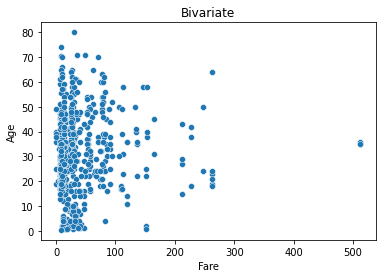

In [26]:
sns.scatterplot(x=df['Fare'], y=df['Age'])
plt.title('Bivariate')

#### correlation

In [27]:
'''
Correlation between age and fare already makes not much of a sense.
So, it's low between each other. 
'''
df[['Fare','Age']].corr()

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


##### heatmap()

<AxesSubplot:>

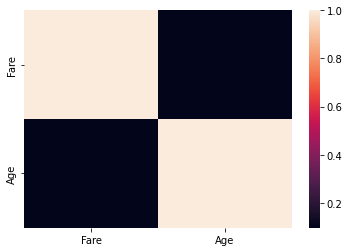

In [28]:
sns.heatmap(df[['Fare','Age']].corr())

### Bivariate Analysis: Categorical

In [33]:
survived_ratio = df[['Pclass','Survived']].groupby('Pclass').sum()
survived_ratio

,Survived
Pclass,
1,136
2,87
3,119


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

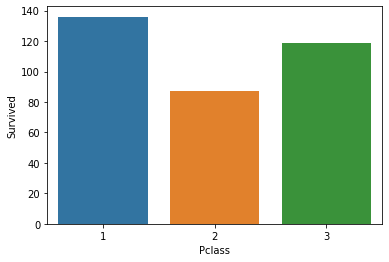

In [34]:
sns.barplot(x=survived_ratio.index, y=survived_ratio['Survived'])

#### Bivariate Analysis: Continuous and Categorical

<AxesSubplot:xlabel='Survived', ylabel='Age'>

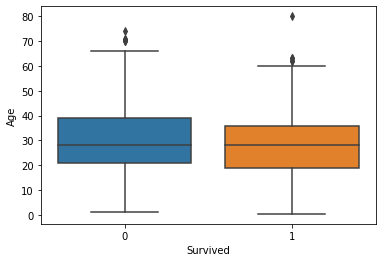

In [35]:
sns.boxplot(x=df['Survived'], y=df['Age'])

<AxesSubplot:xlabel='Sex', ylabel='Age'>

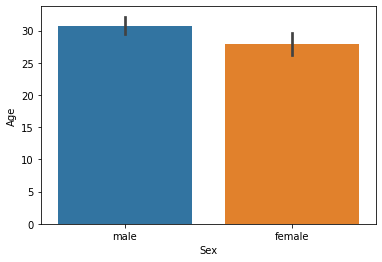

In [36]:
sns.barplot(x=df['Sex'], y=df['Age'])

#### detecting outliers

In [52]:
x = pd.Series([1,2,3,6,7,8,150])
mean = x.mean()
std = x.std()

z_scores = abs((x-mean)/std)
z_scores

0    0.441104
1    0.422941
2    0.404778
3    0.350288
4    0.332125
5    0.313962
6    2.265198
dtype: float64

In [46]:
removed_outliers = x[z_scores >= 1.5]
removed_outliers

6    150
dtype: int64

#### mean/median imputation

In [47]:
import numpy as np
median = np.median(x)
median

6.0

In [55]:
'''
Correcting outlier by replacing median value
'''
x[z_scores > 1.5] = median
x


0    1
1    2
2    3
3    6
4    7
5    8
6    6
dtype: int64

#### Categorical Variable Transformation

In [58]:
df['Sex'].replace({'male':1, 'female': 0}, inplace= True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [64]:
'''
replaced female and male cells with freq value
'''
freq = df['Sex'].value_counts()/len(df['Sex'])
freq

df['Sex'].replace({1: freq[1], 0: freq[0]}, inplace= True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.647587,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.352413,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.352413,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.352413,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.647587,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.647587,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.352413,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.352413,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0.647587,26.0,0,0,111369,30.0000,C148,C
